In [24]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
met = []
with open("../../m1_mig1e-2_k1e3_f1_p0.3_METlineage.txt") as f:
    for line in f:
        met.append(line.strip())
len(met)

37

In [26]:
# read count
count_matrix = pd.read_csv("../readcounts_OU.tsv", index_col=0, header=0, sep="\t")

# set groups
adata = ad.AnnData(count_matrix)
group = [
    "met" if cell in met else "pri"
    for cell in adata.obs.index
]
adata.obs["group"] = group

# Normalize by meidan read count per cell
#scale = np.median(adata.X.sum(axis=1))  # Median total reads per cell

# normalization (should not normalize for simulation as cells have different reads)
#sc.pp.normalize_total(adata, target_sum=500)  
sc.pp.log1p(adata)
#normalized_counts = adata.to_df()  # DataFrame with normalized log1p-transformed counts
#normalized_counts.to_csv("normalized_counts.tsv", sep="\t")

/grid/siepel/home/xing/.conda/envs/OUP/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


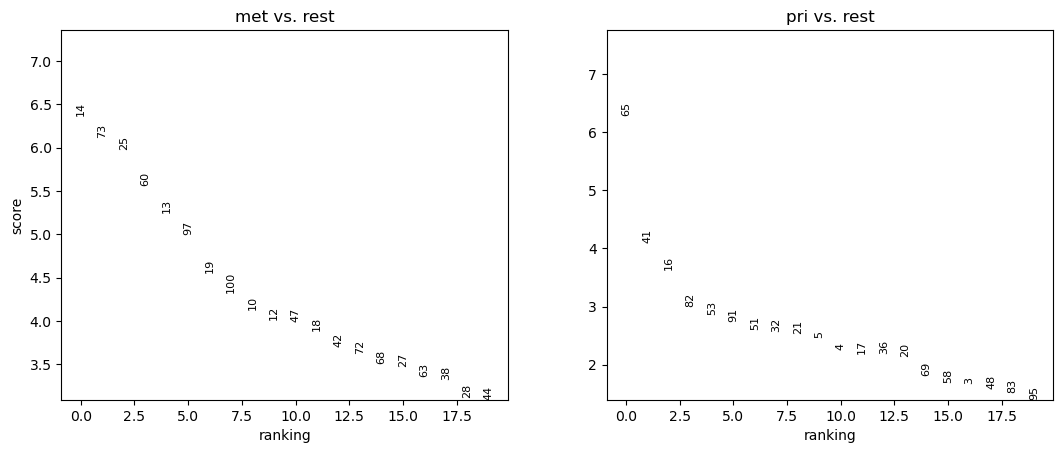

np.int64(39)

In [27]:
# Subset the data to include only "met" and "pri" groups
#adata_sub = adata[adata.obs['group'].isin(['met', 'pri'])]

# Perform DEA using the Wilcoxon method between the "met" and "pri" groups
sc.tl.rank_genes_groups(adata, groupby="group", method="wilcoxon")

# Plot the top 20 genes
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

# Extract the results and store them in a DataFrame
de_results = adata.uns["rank_genes_groups"]
df_de = pd.DataFrame({
    "gene": de_results["names"]["met"],
    "log2FC": de_results["logfoldchanges"]["met"],
    "p_value": de_results["pvals"]["met"],
    "q_value": de_results["pvals_adj"]["met"],
    "signif": de_results["pvals_adj"]["met"] < 0.05
})

# Save the results to a file
df_de.to_csv("./DEA_results_OU.tsv", sep="\t", index=False)
sum(df_de["signif"].values)

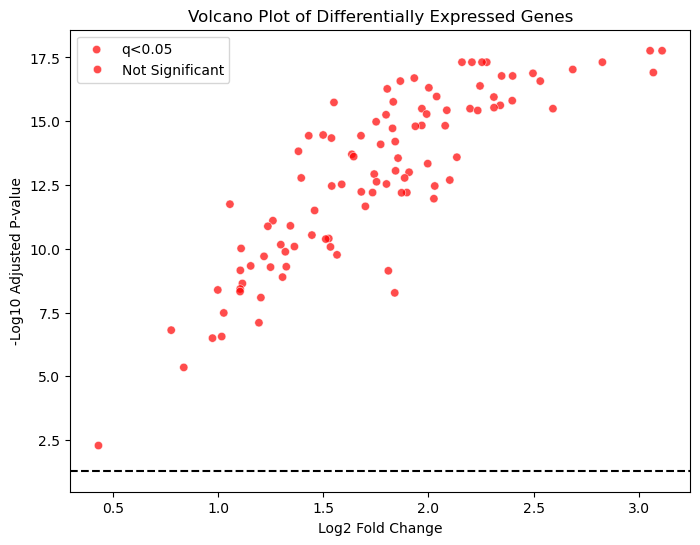

In [21]:
# volcano plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_de["log2FC"],
    y=-np.log10(df_de["q_value"]),
    hue=df_de["q_value"] < 0.05,
    palette={True: "red", False: "gray"},
    alpha=0.7
)
plt.axhline(-np.log10(0.05), linestyle="--", color="black")  # Significance threshold
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 Adjusted P-value")
plt.title("Volcano Plot of Differentially Expressed Genes")
plt.legend(["q<0.05", "Not Significant"])
plt.show()

/grid/siepel/home/xing/.conda/envs/OUP/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


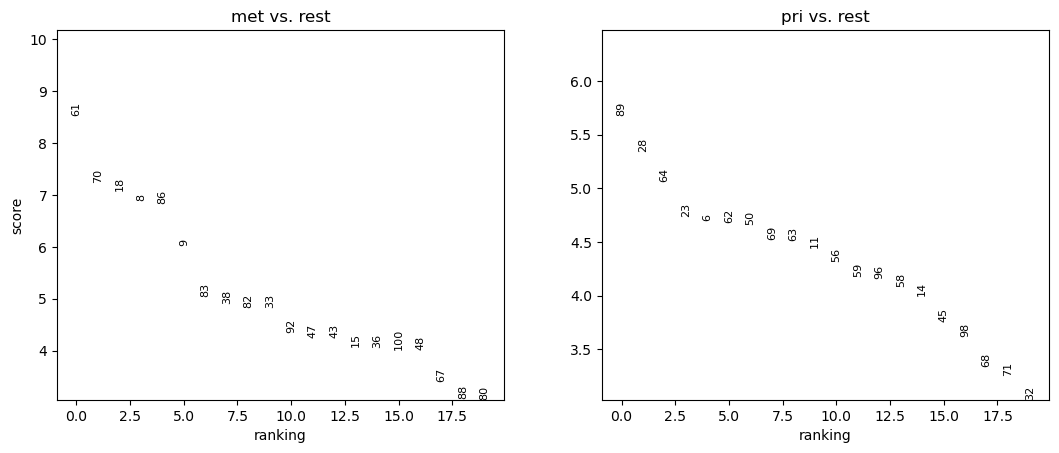

np.int64(58)

In [22]:
# read count
count_matrix = pd.read_csv("../readcounts_BM.tsv", index_col=0, header=0, sep="\t")

# set groups
adata = ad.AnnData(count_matrix)
group = [
    "met" if cell in met else "pri"
    for cell in adata.obs.index
]
adata.obs["group"] = group

# Normalize by meidan read count per cell
scale = np.median(adata.X.sum(axis=1))  # Median total reads per cell

# normalization
#sc.pp.normalize_total(adata, target_sum=scale)  
sc.pp.log1p(adata)
#normalized_counts = adata.to_df()  # DataFrame with normalized log1p-transformed counts
#normalized_counts.to_csv("normalized_counts_BM.tsv", sep="\t")

# Perform DEA using the Wilcoxon method between the "met" and "pri" groups
sc.tl.rank_genes_groups(adata, groupby="group", method="wilcoxon")

# Plot the top 20 genes
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

# Extract the results and store them in a DataFrame
de_results = adata.uns["rank_genes_groups"]
df_de = pd.DataFrame({
    "gene": de_results["names"]["met"],
    "log2FC": de_results["logfoldchanges"]["met"],
    "p_value": de_results["pvals"]["met"],
    "q_value": de_results["pvals_adj"]["met"],
    "signif": de_results["pvals_adj"]["met"] < 0.05
})

# Save the results to a file
df_de.to_csv("./DEA_results_BM.tsv", sep="\t", index=False)
sum(df_de["signif"].values)

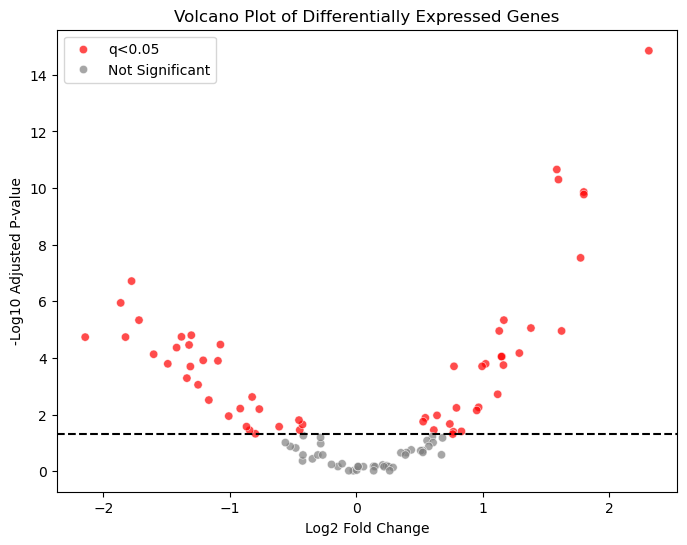

In [23]:
# volcano plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_de["log2FC"],
    y=-np.log10(df_de["q_value"]),
    hue=df_de["q_value"] < 0.05,
    palette={True: "red", False: "gray"},
    alpha=0.7
)
plt.axhline(-np.log10(0.05), linestyle="--", color="black")  # Significance threshold
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 Adjusted P-value")
plt.title("Volcano Plot of Differentially Expressed Genes")
plt.legend(["q<0.05", "Not Significant"])
plt.show()